In [1]:
import sys
sys.path.append('..')
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import numpy as np
np.warnings.filterwarnings('ignore')
import matplotlib
from matplotlib import pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import time
from titration import *
from bindingmodels import *

## preparation
let's get a protein stock and a ligand stock, as well as an empty cell

In [2]:
protein_stock = Solution(conc_p=0.1, d_conc_p=1e-4)
ligand_stock = Solution(conc_l=0.1, d_conc_l=1e-4)
complex_stock = Solution(conc_l=0.1, d_conc_l=1e-4, conc_p=0.1, d_conc_p=1e-4)

we need two wells, one to put ligand solution, one for protein-ligand complex

In [3]:
well_complex = SingleWell()
well_ligand = SingleWell()

## titration

This should model the real process of how the protein and ligand solutions were prepared.

In [4]:
# put ligand solution in both wells
for idx in range(10):
    well_complex.inject(complex_stock, 1, 1e-3)
    well_ligand.inject(ligand_stock, 1, 1e-3)

../titration.py:113: RuntimeWarning: divide by zero encountered in power
  volume_scaling = np.expand_dims(self.vols, axis=1).dot(np.expand_dims(np.power(self.vols, -1), axis=1).transpose())
../titration.py:113: RuntimeWarning: divide by zero encountered in power
  volume_scaling = np.expand_dims(self.vols, axis=1).dot(np.expand_dims(np.power(self.vols, -1), axis=1).transpose())
../titration.py:113: RuntimeWarning: divide by zero encountered in power
  volume_scaling = np.expand_dims(self.vols, axis=1).dot(np.expand_dims(np.power(self.vols, -1), axis=1).transpose())
../titration.py:113: RuntimeWarning: divide by zero encountered in power
  volume_scaling = np.expand_dims(self.vols, axis=1).dot(np.expand_dims(np.power(self.vols, -1), axis=1).transpose())
../titration.py:113: RuntimeWarning: divide by zero encountered in power
  volume_scaling = np.expand_dims(self.vols, axis=1).dot(np.expand_dims(np.power(self.vols, -1), axis=1).transpose())
../titration.py:113: RuntimeWarning: divide b

In [5]:
well_complex.select_non_zero()
well_ligand.select_non_zero()

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]


To make life easier, we pre-calculate what the fluorescence intensities should look like, roughly.

In [6]:
# let's say:
delta_g_truth = -5.0 #kT

In [7]:
well_complex_concs_p_truth = well_complex.concs[0]
well_complex_concs_l_truth = well_complex.concs[1]
concs_p_truth, concs_l_truth, concs_pl_truth = TwoComponentBindingModel.equilibrium_concentrations(
            delta_g_truth, well_complex_concs_p_truth, well_complex_concs_l_truth)


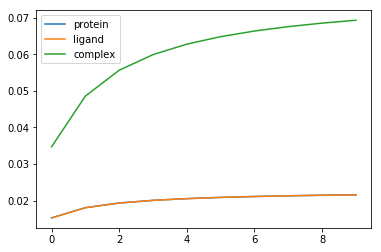

In [8]:
plt.clf()
plt.plot(concs_p_truth, label='protein')
plt.plot(concs_l_truth, label='ligand')
plt.plot(concs_pl_truth, label='complex')
plt.legend()

Let's arbitrarily make some fluorescence constants.

In [9]:
fi_p_truth = 0.2
fi_l_truth = 0.1
fi_pl_truth = 0.5
fi_plate_truth = 0.01
fi_buffer_truth = 0.01
cell_length = 1

In [10]:
fi_complex_truth = fi_p_truth * concs_p_truth + fi_l_truth * concs_l_truth + fi_pl_truth * concs_pl_truth + fi_buffer_truth * cell_length + fi_plate_truth
fi_ligand_truth = fi_l_truth * concs_l_truth + fi_pl_truth * concs_pl_truth + fi_buffer_truth * cell_length + fi_plate_truth

The world isn't perfect, so let's add some noise.

In [11]:
fi_complex = fi_complex_truth + np.random.normal(0, 0.01, fi_complex_truth.shape[0])
fi_ligand = fi_ligand_truth + np.random.normal(0, 0.01, fi_ligand_truth.shape[0])

Start to do some inference.

In [12]:
from inference import *

In [ ]:
make_model(well_complex, well_ligand, fi_complex, fi_ligand)